In [36]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from itertools import combinations

In [29]:
iris = datasets.load_iris(as_frame=True)
df = iris.data
class_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['target'] = iris.target
df['species'] = df['target'].map(class_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Задание 1

##### Корреляции между признаками на всей таблице.

In [3]:
df.drop(['target', 'species'], axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Вывод:** Большинство признаков сильно коррелируют между собой

##### Корреляции между признаками отдельно по классам.

In [4]:
df[df['target'] == 0].drop(['target', 'species'], axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


In [5]:
df[df['target'] == 1].drop(['target', 'species'], axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


In [6]:
df[df['target'] == 2].drop(['target', 'species'], axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


**Вывод:** Матрицы ковариаций во многом отличаются, что может навредить линейному дискриминанту.

#### Визуализация распределения классов на всех парах переменных.

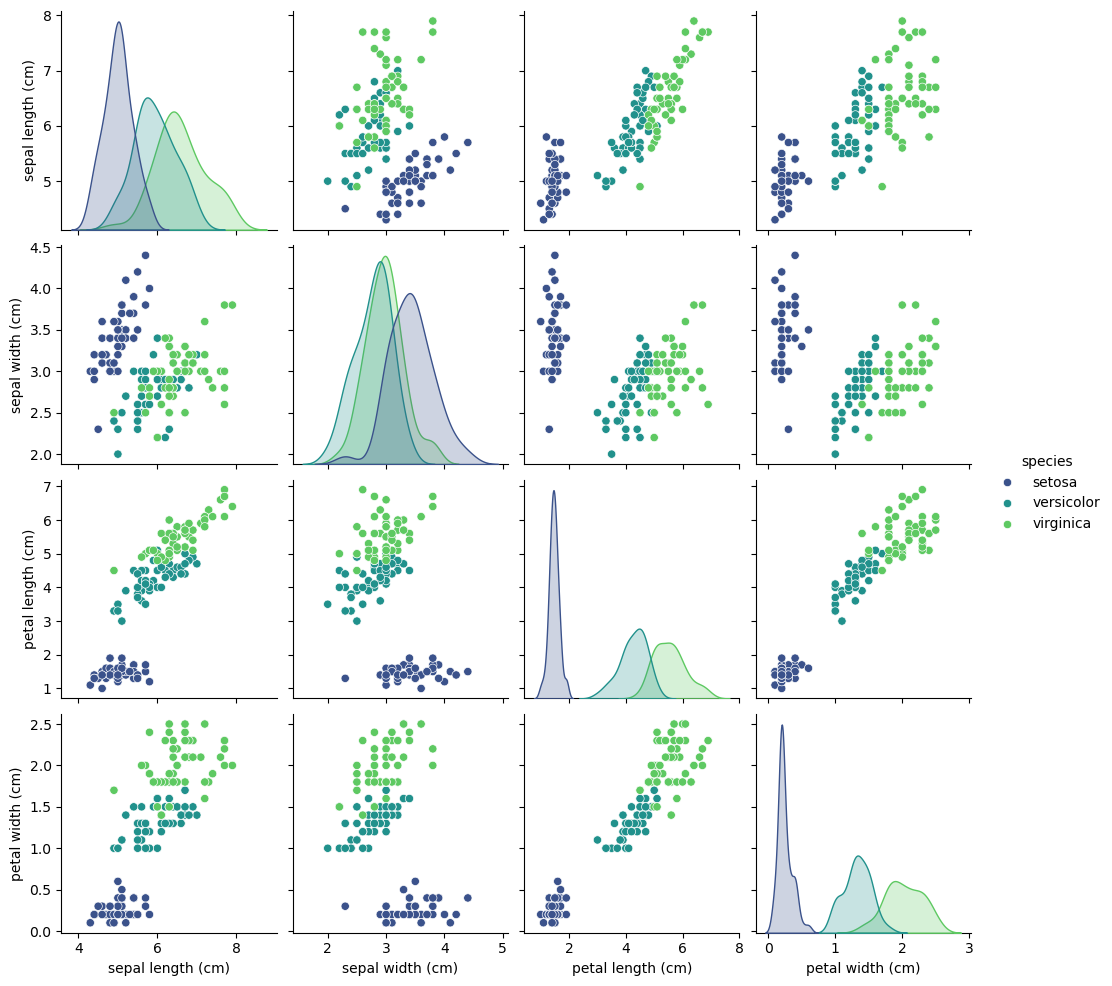

In [7]:
sns.pairplot(df.drop('target', axis=1), hue='species', palette='viridis')

**Вывод:** из графиков видно, что класс setosa практически во всех подпространствах признаков линейно отделим от других классов, следовательно, его всегда можно безошибочно классифицировать.

## Задание 2

In [8]:
# sepal width - petal length -- пример

In [9]:
df_new = df.drop(columns=['sepal length (cm)', 'petal width (cm)'])

In [10]:
df_new

,sepal width (cm),petal length (cm),target,species
0,3.5,1.4,0,setosa
1,3.0,1.4,0,setosa
2,3.2,1.3,0,setosa
3,3.1,1.5,0,setosa
4,3.6,1.4,0,setosa
...,...,...,...,...
145,3.0,5.2,2,virginica
146,2.5,5.0,2,virginica
147,3.0,5.2,2,virginica
148,3.4,5.4,2,virginica


In [11]:
X = datasets.load_iris().data[:, 1:3]

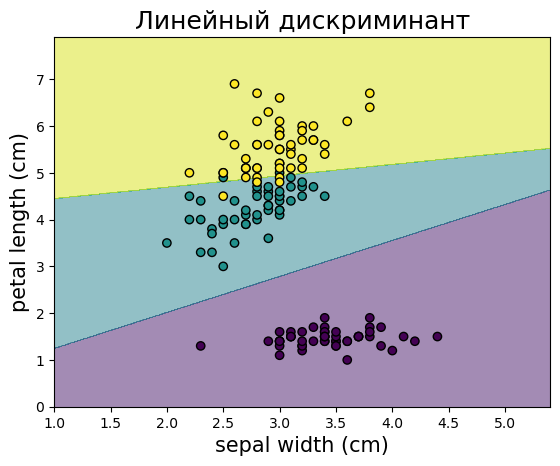

Accuracy =  0.9533333333333334
Balanced accuracy =  0.9533333333333333


In [12]:
clf = LinearDiscriminantAnalysis(solver='lsqr').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Линейный дискриминант', fontsize=18)
plt.show()
acc = accuracy_score(df_new.target, clf.predict(X))
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Accuracy = ', acc)
print('Balanced accuracy = ', balanced_acc)

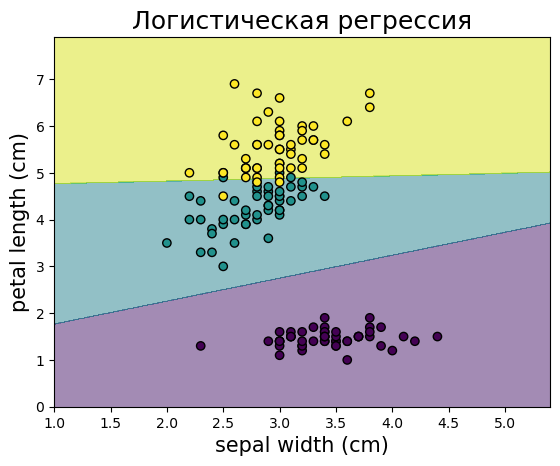

Balanced accuracy =  0.9533333333333333


In [13]:
clf = LogisticRegression().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Логистическая регрессия', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

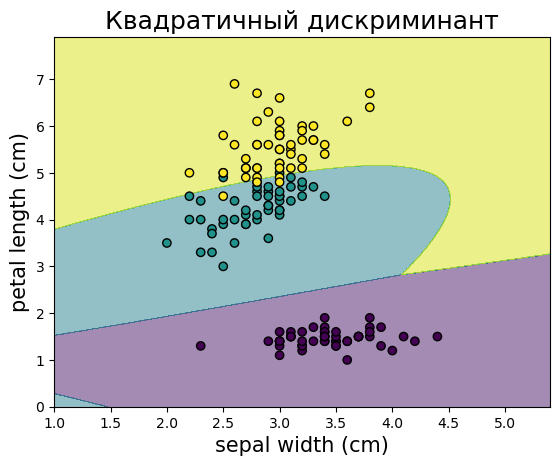

Balanced accuracy =  0.9533333333333333


In [14]:
clf = QuadraticDiscriminantAnalysis().fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Квадратичный дискриминант', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

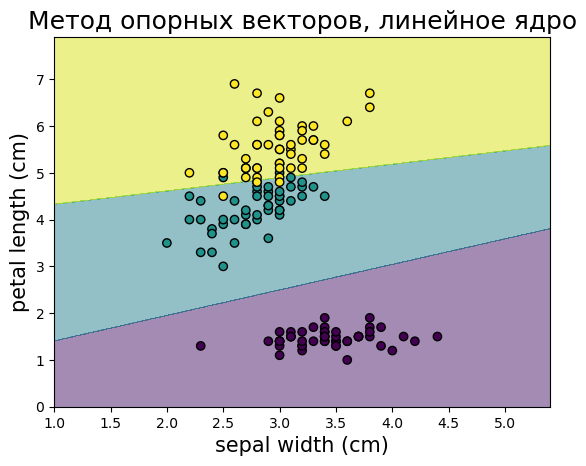

Balanced accuracy =  0.96


In [15]:
clf = SVC(kernel='linear').fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Метод опорных векторов, линейное ядро', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

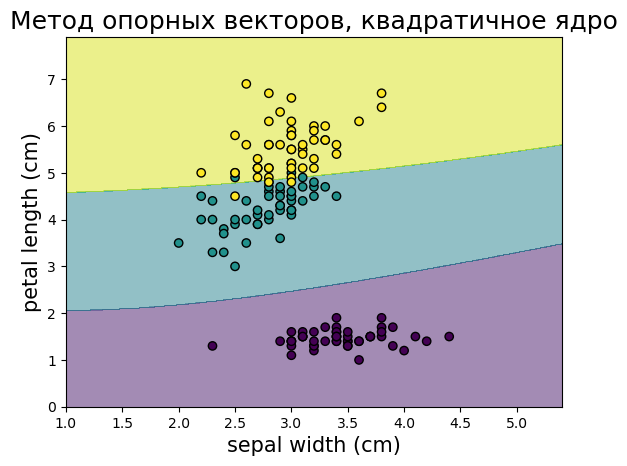

Balanced accuracy =  0.96


In [16]:
clf = SVC(kernel='poly', degree=2).fit(X, df_new.target)
disp = DecisionBoundaryDisplay.from_estimator(
     clf, X, response_method="predict",
     alpha=0.5, grid_resolution=1000)
disp.ax_.scatter(X[:, 0], X[:, 1], c=df_new.target, edgecolor="k")
plt.xlabel('sepal width (cm)', fontsize=15)
plt.ylabel('petal length (cm)', fontsize=15)
plt.title('Метод опорных векторов, квадратичное ядро', fontsize=18)
plt.show()
balanced_acc = balanced_accuracy_score(df_new.target, clf.predict(X))
print('Balanced accuracy = ', balanced_acc)

**Вывод:** Все методы хорошо справляются с задачей. SVC показывает чуть большую точность, что в рамках задачи кажется неважным.

## Задание 3

In [ ]:
train = df.loc[df['species'] != 'setosa'].reset_index(drop=True)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,7.0,3.2,4.7,1.4,1,versicolor
1,6.4,3.2,4.5,1.5,1,versicolor
2,6.9,3.1,4.9,1.5,1,versicolor
3,5.5,2.3,4.0,1.3,1,versicolor
4,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2,virginica
96,6.3,2.5,5.0,1.9,2,virginica
97,6.5,3.0,5.2,2.0,2,virginica
98,6.2,3.4,5.4,2.3,2,virginica


In [27]:
features = iris.feature_names
pairs = list(combinations(features, 2))

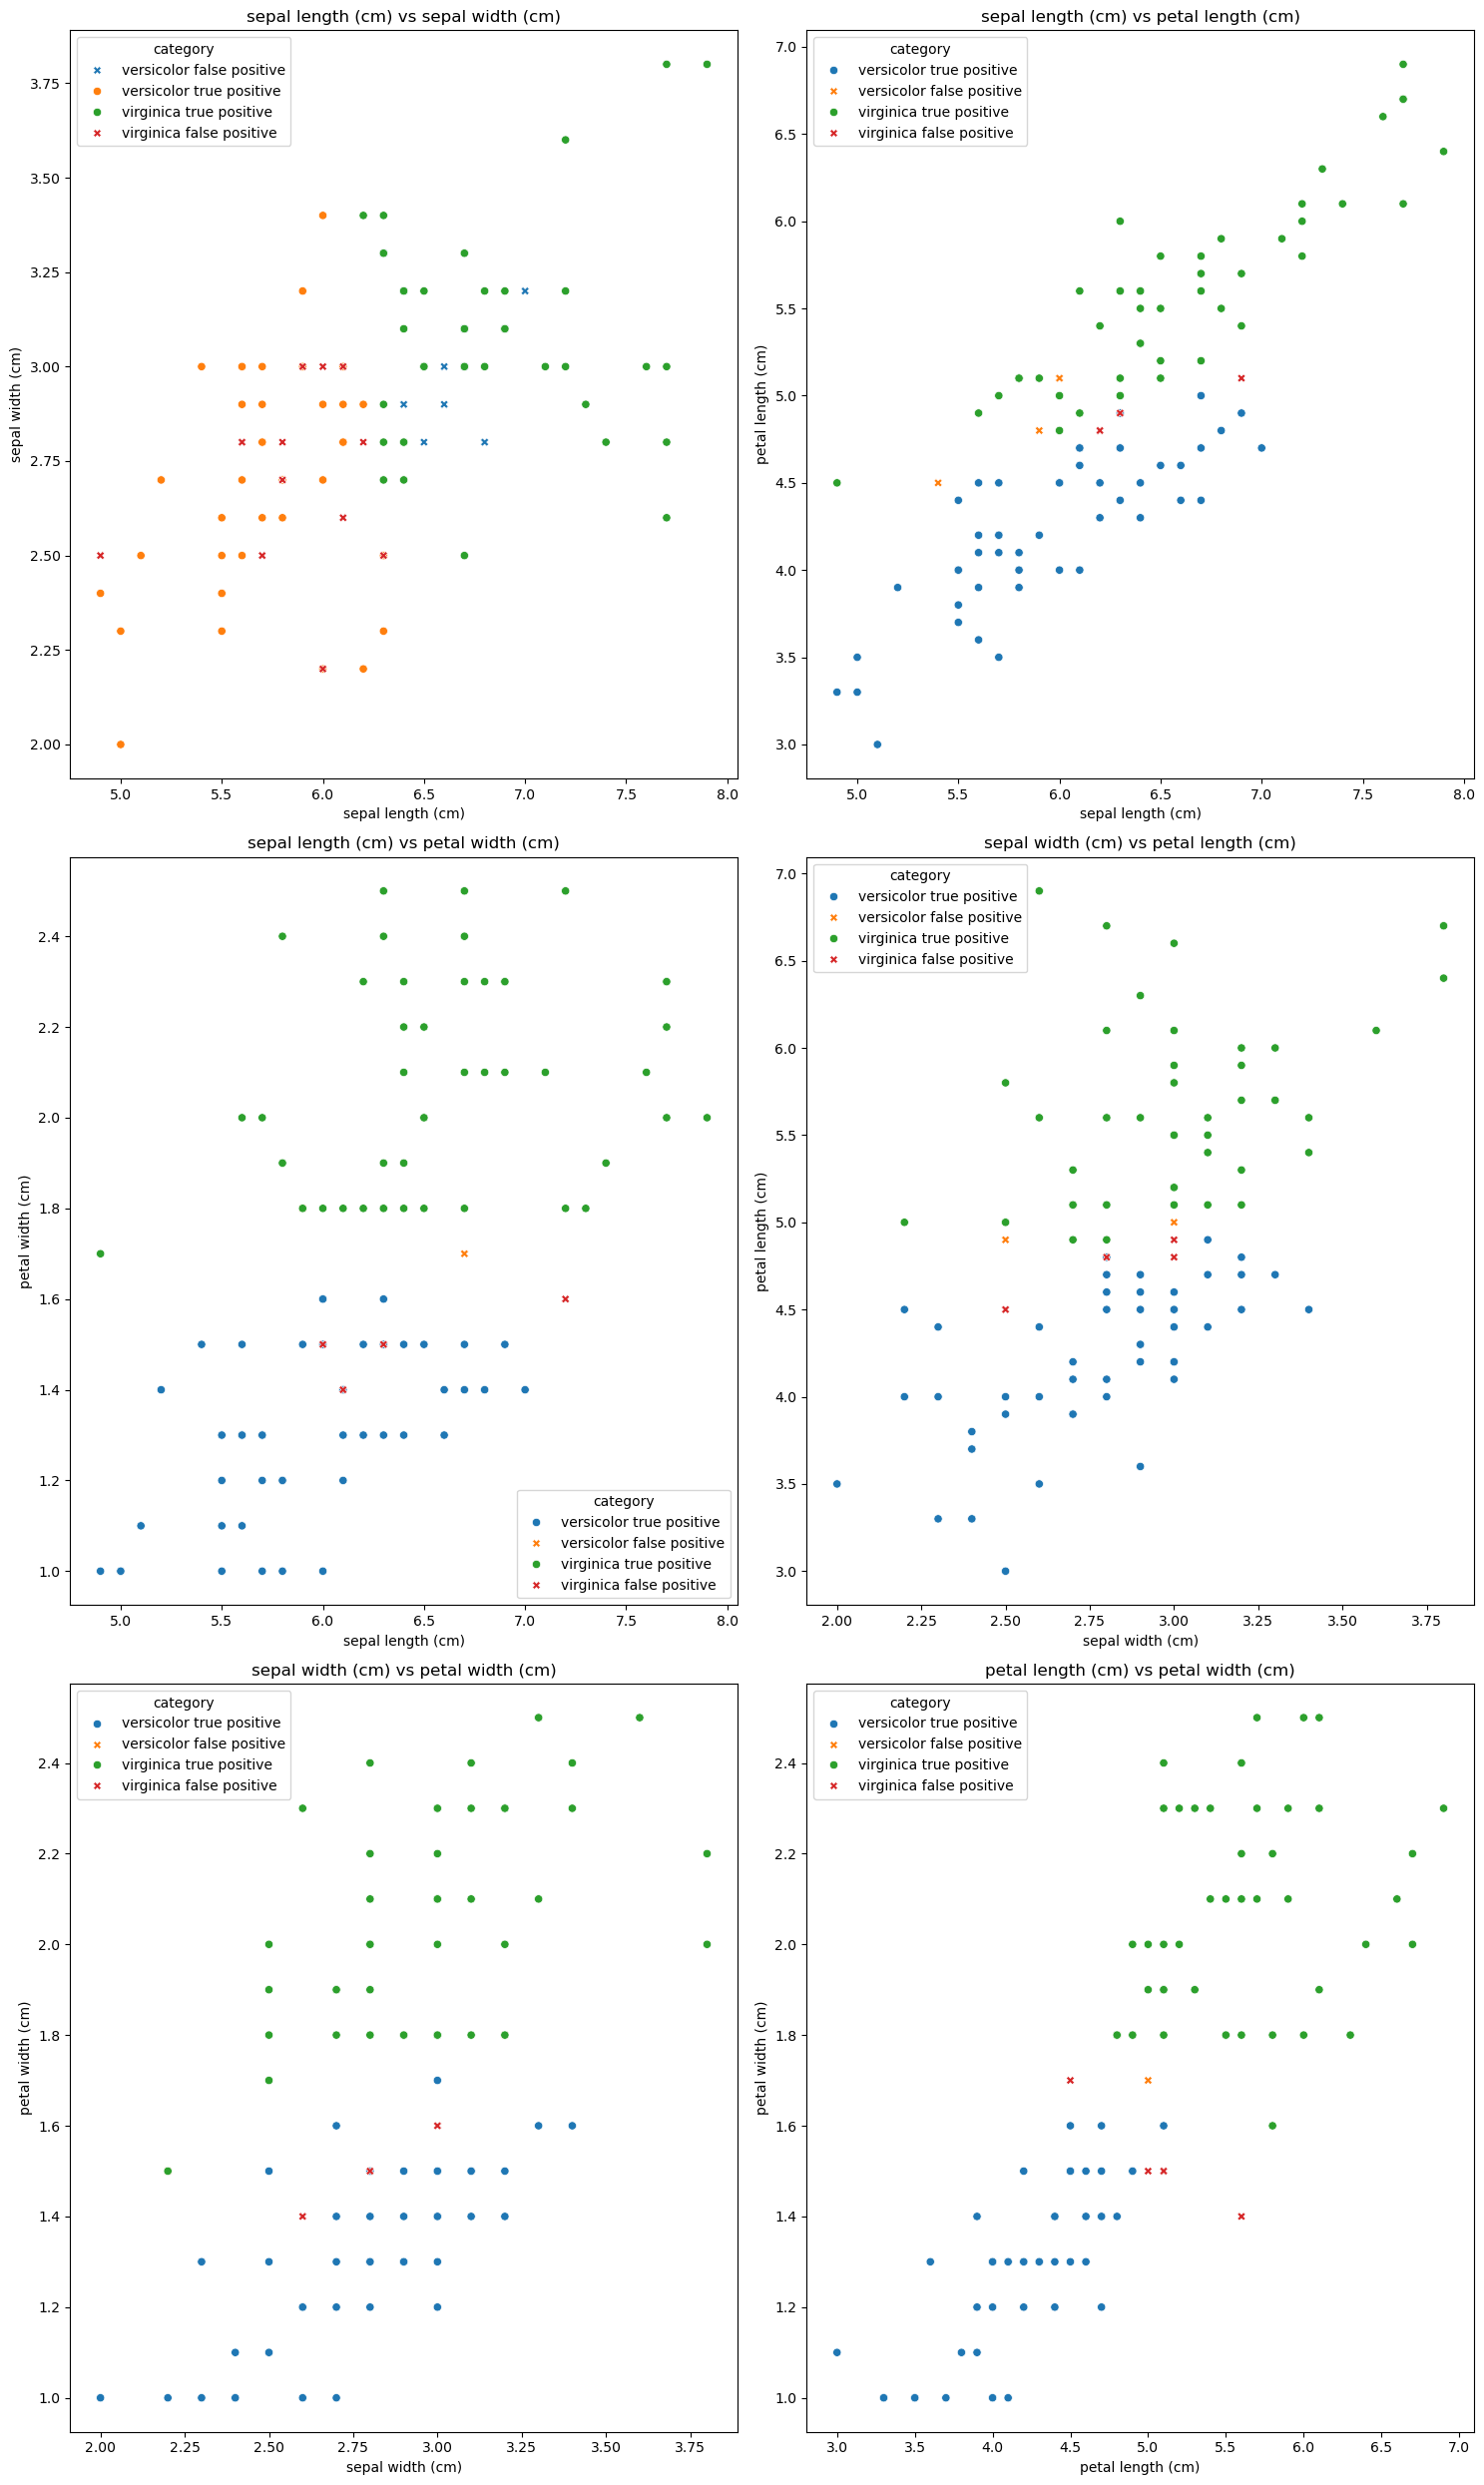

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 25))
axs = axs.flatten()

for i, (feat1, feat2) in enumerate(pairs):
    X = train[[feat1, feat2]]
    y = train['target']
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    y_pred = lda.predict(X)
    
    # Создаем столбец для категории: class + true/false positive
    df_temp = X.copy()
    df_temp['true_class'] = train['species']
    df_temp['pred_target'] = y_pred
    df_temp['pred_class'] = df_temp['pred_target'].map(class_map)
    df_temp['correct'] = df_temp['true_class'] == df_temp['pred_class']
    df_temp['category'] = df_temp['true_class'] + ' ' + np.where(df_temp['correct'], 'true positive', 'false positive')
    
    # График
    sns.scatterplot(
        data=df_temp,
        x=feat1,
        y=feat2,
        hue='category',
        style='category',
        # palette={
        #     'versicolor true positive': 'green',
        #     'virginica true positive': 'blue',
        #     'versicolor false positive': 'red',
        #     'virginica false positive': 'red'
        # },
        markers={
            'versicolor true positive': 'o',
            'virginica true positive': 'o',
            'versicolor false positive': 'X',
            'virginica false positive': 'X'
        },
        ax=axs[i]
    )
    
    axs[i].set_title(f'{feat1} vs {feat2}')

plt.tight_layout()
plt.show()

**Вывод:** В первом подпрастрансве сразу бросается в глаза большое количество неверно классифицированных объектов. Так же теперь на графиках хорошо видна линейная зависимость таких переменных, как petal length и sepal length, а также petal length и petal width. Это логично, ведь у них очень большая корреляция (более 0.8)

## Задание 4

In [53]:
def Q_1(x, Sigma, mu):
    x = np.array(x)
    Sigma_inv = np.linalg.inv(Sigma)
    const = -0.5 * np.log(np.linalg.det(Sigma))
    quad_term = -0.5 * (x - mu).T @ Sigma_inv @ (x - mu)
    return const + quad_term


def Q_2(x, Lamda, nu):
    x = np.array(x)
    const = -0.5 * np.log(np.linalg.det(Lamda))
    quad_term = -0.5 * (x - nu).T @ Lamda @ (x - nu)
    return const + quad_term


def l_0(x, df_X_1, df_X_2):    
    return Q_1(x, df_X_1.cov(), df_X_1.mean()) - Q_2(x, df_X_2.cov(), df_X_2.mean())

    
def plot_decision_curve_comparison(X, y, h=0.01):
    # Создаем сетку для визуализации
    x_min, x_max = X['sepal width (cm)'].min(), X['sepal width (cm)'].max()
    y_min, y_max = X['petal length (cm)'].min(), X['petal length (cm)'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    return grid_points

In [38]:
X_train = train[['sepal width (cm)', 'petal length (cm)']]
y_train = train.target

In [54]:
plot_decision_curve_comparison(X_train, y_train)

array([[2.  , 3.  ],
       [2.01, 3.  ],
       [2.02, 3.  ],
       ...,
       [3.77, 6.89],
       [3.78, 6.89],
       [3.79, 6.89]], shape=(70200, 2))

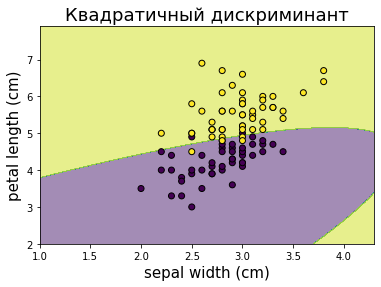

In [141]:
# из sklearn

**Вывод:** 